<a href="https://colab.research.google.com/github/KonstantinData/Bootcamp-Analytics/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------
```markdown
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com
```
------------------------------
❗❗❗ **IMPORTANT**❗❗❗ **Create a copy of this notebook**

In order to work with this Google Colab you need to create a copy of it. Please **DO NOT** provide your answers here. Instead, work on the copy version. To make a copy:

**Click on: File -> save a copy in drive**

Have you successfully created the copy? if yes, there must be a new tab opened in your browser. Now move to the copy and start from there!

----------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.datasets import fetch_openml, make_blobs, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from itertools import combinations, product

# Clustering
Clustering is an unsupervised learning technique used to group similar data points into clusters. It is commonly used for exploratory data analysis, pattern recognition, and image processing. In what follows, we will cover two popular clustering algorithms: K-Means and Hierarchical Clustering.

## K-Means
K-Means clustering is an iterative algorithm that partitions a dataset into K clusters. Each cluster is defined by its centroid, which is the mean of the data points in the cluster.

Here is the the algorithm's steps:

1. Choose the number of clusters $K$.
1. Initialize the centroids randomly.
1. Assign each data point to the nearest centroid based on the **distance**.
1. Calculate the new centroids by taking the mean of all data points assigned to each cluster.
1. Repeat the assignment and update steps until the centroids no longer change significantly.

#### Example
Let us perform clustering on the following dataset created by means of sickit-learn.

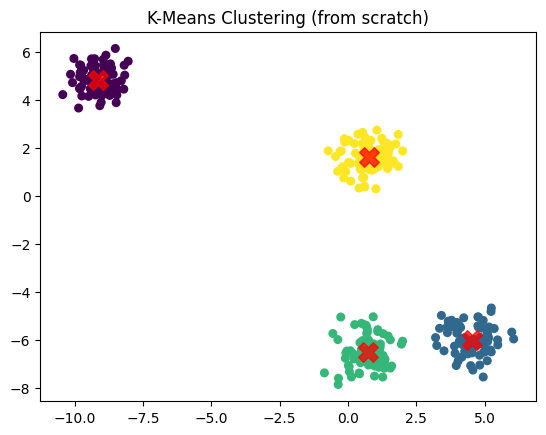

In [ ]:
# K-Means Algorithm
def kmeans(X, k, max_iters=100, tol=1e-5):

    # Step 1: Initializing the centroids
    # Randomly select k unique points from the dataset as initial centroids
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        # Save the old centroids for convergence check
        old_centroids = centroids

        # Step2: Assigning each data point to its nearest centroid
        # Calculate distances between each point and each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        # Assign each point to the closest centroid
        labels = np.argmin(distances, axis=1)

        # Calculate the new centroids as the mean of points in each cluster
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence (if centroids do not change significantly)
        if np.linalg.norm(centroids - old_centroids) < tol:
            break

    return centroids, labels


# Generate dummy data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6)
# Running K-Means with k=4
k = 4
centroids, labels = kmeans(X, k)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.show()

#### Exercise 1
We use the Iris dataset, a classic dataset in data science and machine learning, and perform K-Means clustering. The dataset consists of 150 samples from three species of Iris flowers (Iris setosa, Iris versicolor, and Iris virginica). Each sample has four features:
+ **sepal length**,
+ **sepal width**,
+ **petal length**, and
+ **petal width**.

Perform clustering using the function we developed previously.

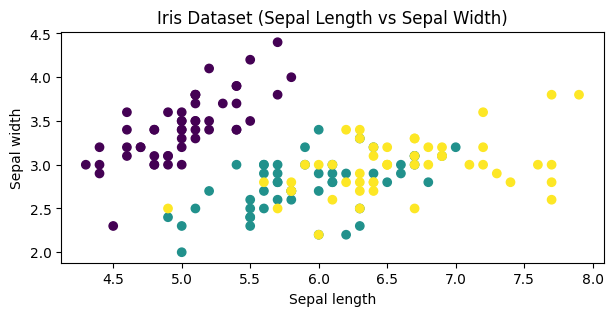

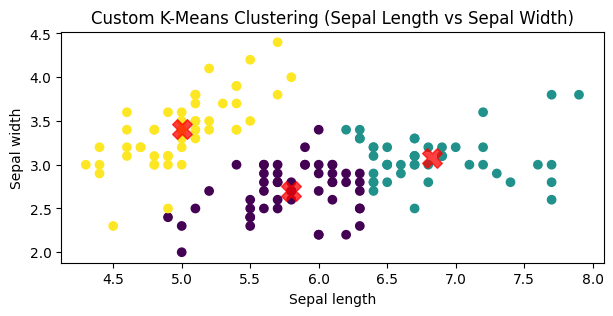

In [ ]:
# Load the Iris dataset
iris = load_iris()
# We'll only use the first two features for easy visualization
X = iris.data[:, :2]
y = iris.target

# Plot the dataset
plt.figure(figsize=(7, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset (Sepal Length vs Sepal Width)')
plt.show()


# Applying K-Means with k=3 (since there are 3 species of Iris)
k = 3
custom_centroids, custom_labels = # Your code

# Plot the result
plt.figure(figsize=(7, 3))
plt.scatter(X[:, 0], X[:, 1], c=custom_labels, cmap='viridis')
plt.scatter(custom_centroids[:, 0], custom_centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Custom K-Means Clustering (Sepal Length vs Sepal Width)')
plt.show()

#### Exercise 2
Solve the above-mentioned problem using the sickit-learn package.
<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


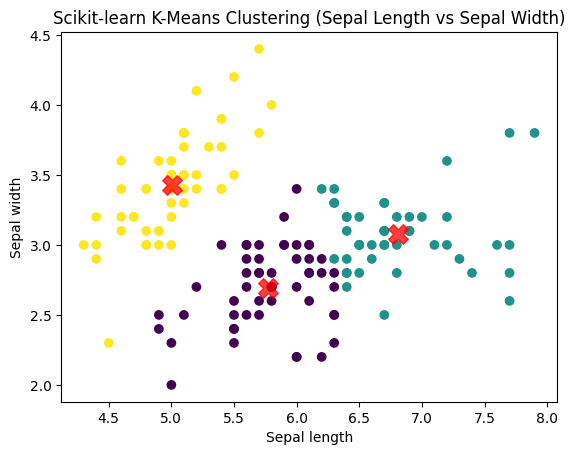

In [ ]:
# Load the Iris dataset
iris = load_iris()
# We'll only use the first two features for easy visualization
X = # Your code
y = iris.target

# Applying K-Means using Scikit-learn
kmeans_sklearn = # Your code
sklearn_labels = kmeans_sklearn.fit_predict(X)
sklearn_centroids = kmeans_sklearn.cluster_centers_

# Plot the result
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis')
plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scikit-learn K-Means Clustering (Sepal Length vs Sepal Width)')
plt.show()

## Hierachical Clustering
Hierarchical clustering is a method of clustering that builds a hierarchy of clusters. There are two types:

1. **Agglomerative (Bottom-Up)**: Each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
1. **Divisive (Top-Down)**: All data points start in one cluster, and splits are performed recursively as one moves down the hierarchy.

**Note** that we **WILL NOT** introduce the divisive algorithm as it is the exact oposite of the Agglomerative algorithm.

### Agglomerative Hierarchical Clustering (AHC)
Agglomerative clustering, also known as bottom-up clustering, starts with each data point as its own cluster. It then iteratively merges the closest pair of clusters until only one cluster remains or until a stopping criterion is met. Here is the step-by-step impelementation of the algorithm:

1. Start with each data point as its own cluster.
1. Calculate the distance between each pair of clusters.
1. Merge the two closest clusters.
1. Repeat steps 2-3 until only one cluster remains or a stopping criterion is met.

Let us begin by defining a function which calculates the minimum distance between two clusters.

minimum distance between clusters 1 & 2: 7.38
minimum distance between clusters 1 & 3: 6.00
minimum distance between clusters 2 & 3: 6.14


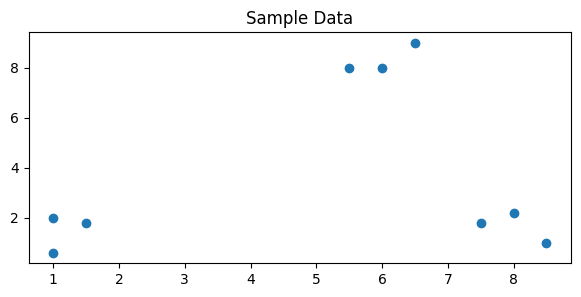

In [ ]:
def calculate_min_cluster_distance(cluster1: list|np.ndarray,
                                   cluster2: list|np.ndarray) -> float:
  if isinstance(cluster1, np.ndarray):
    cluster1 = cluster1.tolist()
  if isinstance(cluster2, np.ndarray):
    cluster2 = cluster2.tolist()

  min_dist = np.inf
  for p1 in cluster1:
    for p2 in cluster2:
      dist = np.linalg.norm(np.array(p1) - np.array(p2))
      if dist < min_dist:
          min_dist = dist
  return min_dist

# Generate sample data
data = np.array([[1, 2], [1.5, 1.8], [1, 0.6],
                 [5.5, 8], [6, 8], [6.5, 9],
                 [7.5, 1.8], [8, 2.2], [8.5, 1]])
cluster1 = np.array([[1, 2], [1.5, 1.8], [1, 0.6]])
cluster2 = np.array([[5.5, 8], [6, 8], [6.5, 9]])
cluster3 = np.array([[7.5, 1.8], [8, 2.2], [8.5, 1]])
min_dist_12 = calculate_min_cluster_distance(cluster1, cluster2)
min_dist_13 = calculate_min_cluster_distance(cluster1, cluster3)
min_dist_23 = calculate_min_cluster_distance(cluster2, cluster3)
print(f"minimum distance between clusters 1 & 2: {min_dist_12:.2f}")
print(f"minimum distance between clusters 1 & 3: {min_dist_13:.2f}")
print(f"minimum distance between clusters 2 & 3: {min_dist_23:.2f}")

# Plot the data
plt.figure(figsize=(7, 3))
plt.scatter(data[:, 0], data[:, 1])
plt.title('Sample Data')
plt.show();

Having implemented the distance calculator function, we can now write a function which implements the algorithm steb-by-step. That is, it begins by assigning each point as its own cluster, calculating the min distances between the clusters, and merging the clusters.

In [ ]:
# Function to perform agglomerative hierarchical clustering
def agglomerative_clustering(data: list|np.ndarray):

  if isinstance(data, np.ndarray):
      data = data.tolist()

  # Start with each point as its own cluster
  clusters = [[i] for i in data]
  all_clusters = {}
  level = len(clusters) - 1

  while len(clusters) > 1:
      min_dist = np.inf
      closest_clusters = (0, 1)

      # Find the two closest clusters
      for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
          dist = calculate_min_cluster_distance(clusters[i], clusters[j])
          if dist < min_dist:
            min_dist = dist
            closest_clusters = (i, j)

      # Merge the two closest clusters
      cluster1, cluster2 = closest_clusters
      clusters[cluster1] = clusters[cluster1] + clusters[cluster2]
      clusters.pop(cluster2)
      all_clusters["level " + str(level)] =  clusters.copy()
      level -= 1

      # Print the merging process
      # print(f"Clusters {cluster1} and {cluster2} were merged.", "\n")

  return all_clusters

# Generate synthetic data
data = np.array([[1, 2], [1.5, 1.8], [1, 0.6],
                 [5.5, 8], [6, 8], [6.5, 9],
                 [7.5, 1.8], [8, 2.2], [8.5, 1]])

# Perform agglomerative clustering
final_cluster = agglomerative_clustering(data)
print("Final cluster:", final_cluster)

Final cluster: {'level 8': [[[1.0, 2.0]], [[1.5, 1.8]], [[1.0, 0.6]], [[5.5, 8.0], [6.0, 8.0]], [[6.5, 9.0]], [[7.5, 1.8]], [[8.0, 2.2]], [[8.5, 1.0]]], 'level 7': [[[1.0, 2.0], [1.5, 1.8]], [[1.0, 0.6]], [[5.5, 8.0], [6.0, 8.0]], [[6.5, 9.0]], [[7.5, 1.8]], [[8.0, 2.2]], [[8.5, 1.0]]], 'level 6': [[[1.0, 2.0], [1.5, 1.8]], [[1.0, 0.6]], [[5.5, 8.0], [6.0, 8.0]], [[6.5, 9.0]], [[7.5, 1.8], [8.0, 2.2]], [[8.5, 1.0]]], 'level 5': [[[1.0, 2.0], [1.5, 1.8]], [[1.0, 0.6]], [[5.5, 8.0], [6.0, 8.0], [6.5, 9.0]], [[7.5, 1.8], [8.0, 2.2]], [[8.5, 1.0]]], 'level 4': [[[1.0, 2.0], [1.5, 1.8]], [[1.0, 0.6]], [[5.5, 8.0], [6.0, 8.0], [6.5, 9.0]], [[7.5, 1.8], [8.0, 2.2], [8.5, 1.0]]], 'level 3': [[[1.0, 2.0], [1.5, 1.8], [1.0, 0.6]], [[5.5, 8.0], [6.0, 8.0], [6.5, 9.0]], [[7.5, 1.8], [8.0, 2.2], [8.5, 1.0]]], 'level 2': [[[1.0, 2.0], [1.5, 1.8], [1.0, 0.6], [7.5, 1.8], [8.0, 2.2], [8.5, 1.0]], [[5.5, 8.0], [6.0, 8.0], [6.5, 9.0]]], 'level 1': [[[1.0, 2.0], [1.5, 1.8], [1.0, 0.6], [7.5, 1.8], [8.0, 

#### Exercise 3
 A retail company wants to segment its customers based on their purchasing behavior to tailor marketing strategies more effectively.

The following dataset shows the customers' purchasing behaviors. Each customer is represented by a data point with two features:

+  Annual Income (AI) [in thousands of dollars]
+  Propensity to Consume (PC): A score between 1 and 100 indicating how much a customer spends.

\ | c1 | c2 | c3 | c4 | c5 | c6 | c7 | c8 | c9 | c10 | c11 | c12 | c13 | c14 | c15
:-: | :-: | :-: |  :-: | :-: | :-: | :-: | :-: |  :-: | :-: |  :-: | :-: | :-: | :-: | :-: | :-:
Income | 15 | 16 |  17 | 18 | 19 | 20 |  21 | 22 | 23 |  24 | 25 | 26 | 27 | 28 | 29
PC | 39 | 81 |  6 | 77 | 40 | 76 |  6 | 94 | 3 |  72 | 14 | 99 | 15 | 39 | 77

Apply Agglomerative clustering and visualize the clusters at each stage.

Final cluster: {'level 14': [[[15.0, 39.0]], [[16.0, 46.0]], [[16.5, 29.0]], [[18.0, 77.0], [20.0, 76.0]], [[19.0, 69.0]], [[21.0, 6.0]], [[22.0, 14.0]], [[23.0, 3.0]], [[26.0, 31.0]], [[25.0, 14.0]], [[26.0, 41.0]], [[27.0, 15.0]], [[28.0, 39.0]], [[26.5, 37.0]]], 'level 13': [[[15.0, 39.0]], [[16.0, 46.0]], [[16.5, 29.0]], [[18.0, 77.0], [20.0, 76.0]], [[19.0, 69.0]], [[21.0, 6.0]], [[22.0, 14.0]], [[23.0, 3.0]], [[26.0, 31.0]], [[25.0, 14.0], [27.0, 15.0]], [[26.0, 41.0]], [[28.0, 39.0]], [[26.5, 37.0]]], 'level 12': [[[15.0, 39.0]], [[16.0, 46.0]], [[16.5, 29.0]], [[18.0, 77.0], [20.0, 76.0]], [[19.0, 69.0]], [[21.0, 6.0]], [[22.0, 14.0]], [[23.0, 3.0]], [[26.0, 31.0]], [[25.0, 14.0], [27.0, 15.0]], [[26.0, 41.0]], [[28.0, 39.0], [26.5, 37.0]]], 'level 11': [[[15.0, 39.0]], [[16.0, 46.0]], [[16.5, 29.0]], [[18.0, 77.0], [20.0, 76.0]], [[19.0, 69.0]], [[21.0, 6.0]], [[22.0, 14.0]], [[23.0, 3.0]], [[26.0, 31.0]], [[25.0, 14.0], [27.0, 15.0]], [[26.0, 41.0], [28.0, 39.0], [26.5, 37.0]

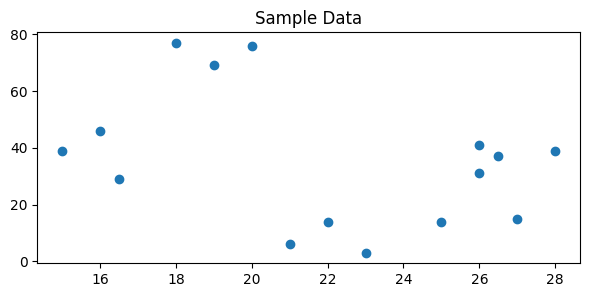

In [ ]:
data = np.array([[15, 39], [16, 46], [16.5, 29], [18, 77], [19, 69],
                 [20, 76], [21, 6], [22, 14], [23, 3], [26, 31],
                 [25, 14], [26, 41], [27, 15], [28, 39], [26.5, 37]])

# Perform agglomerative clustering
final_cluster = agglomerative_clustering(data)
print("Final cluster:", final_cluster)
level = "level 4"
for i in range(len(final_cluster[level])):
  print(f"{level} cluster {i + 1}:", final_cluster[level][i])

# Plot the data
plt.figure(figsize=(7, 3))
plt.scatter(data[:, 0], data[:, 1])
plt.title('Sample Data')
plt.show();


#### Exercise 4
Solve the problem in the example above using sickit-learn package. Compare the results and report your observations.


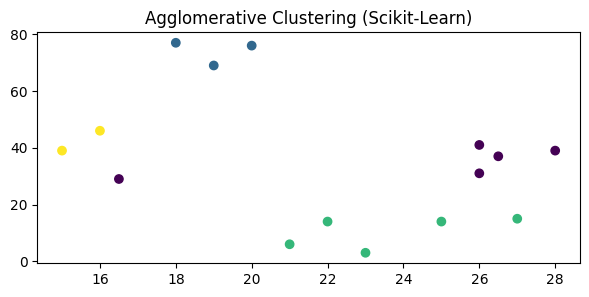

In [ ]:
data = np.array([[15, 39], [16, 46], [16.5, 29], [18, 77], [19, 69],
                 [20, 76], [21, 6], [22, 14], [23, 3], [26, 31],
                 [25, 14], [26, 41], [27, 15], [28, 39], [26.5, 37]])

# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=4).fit(data)

# Plot the clustered data
plt.figure(figsize=(7, 3))
plt.scatter(data[:, 0], data[:, 1], c=clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering (Scikit-Learn)')
plt.show()


**Congratulations! You have finished the Notebook! Great Job!**
🤗🙌👍👏💪
<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->